In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./xAPI-Edu-Data.csv")
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
## Reading dataset general information:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [4]:
# convert text data to numeric based on unique values
def convert_text_to_numeric(df):
    # make empty dataframe
    new_df = pd.DataFrame()
    for column in df.columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            print(unique_elements)
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            df[column] = list(map(convert_to_int, df[column]))
            new_df[column] = df[column]
    return df, new_df

df5_numeric, df_categorical = convert_text_to_numeric(data.copy())
df_categorical

{'M', 'F'}
{'Iraq', 'Palestine', 'lebanon', 'USA', 'Syria', 'venzuela', 'Iran', 'Morocco', 'Lybia', 'Egypt', 'SaudiArabia', 'Jordan', 'Tunis', 'KW'}
{'Iraq', 'Palestine', 'KuwaIT', 'lebanon', 'USA', 'Syria', 'venzuela', 'Iran', 'Morocco', 'Lybia', 'Egypt', 'SaudiArabia', 'Jordan', 'Tunis'}
{'MiddleSchool', 'lowerlevel', 'HighSchool'}
{'G-02', 'G-12', 'G-07', 'G-10', 'G-05', 'G-06', 'G-04', 'G-11', 'G-08', 'G-09'}
{'B', 'A', 'C'}
{'Geology', 'Math', 'English', 'Spanish', 'Biology', 'History', 'Arabic', 'IT', 'Chemistry', 'Quran', 'French', 'Science'}
{'F', 'S'}
{'Mum', 'Father'}
{'Yes', 'No'}
{'Good', 'Bad'}
{'Above-7', 'Under-7'}
{'M', 'H', 'L'}


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,13,2,1,6,1,7,0,1,0,0,1,0
1,0,13,2,1,6,1,7,0,1,0,0,1,0
2,0,13,2,1,6,1,7,0,1,1,1,0,2
3,0,13,2,1,6,1,7,0,1,1,1,0,2
4,0,13,2,1,6,1,7,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,11,12,0,8,1,8,1,1,1,1,0,2
476,1,11,12,0,8,1,0,0,1,1,1,1,0
477,1,11,12,0,8,1,0,1,1,1,1,1,0
478,1,11,12,0,8,1,5,0,1,1,1,0,2


In [5]:
numerical_colums = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
data_numeric = df5_numeric[numerical_colums]
data_categorical = df5_numeric.drop(numerical_colums, axis=1)
data_numeric.head()
data_categorical.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,13,2,1,6,1,7,0,1,0,0,1,0
1,0,13,2,1,6,1,7,0,1,0,0,1,0
2,0,13,2,1,6,1,7,0,1,1,1,0,2
3,0,13,2,1,6,1,7,0,1,1,1,0,2
4,0,13,2,1,6,1,7,0,1,1,1,0,0


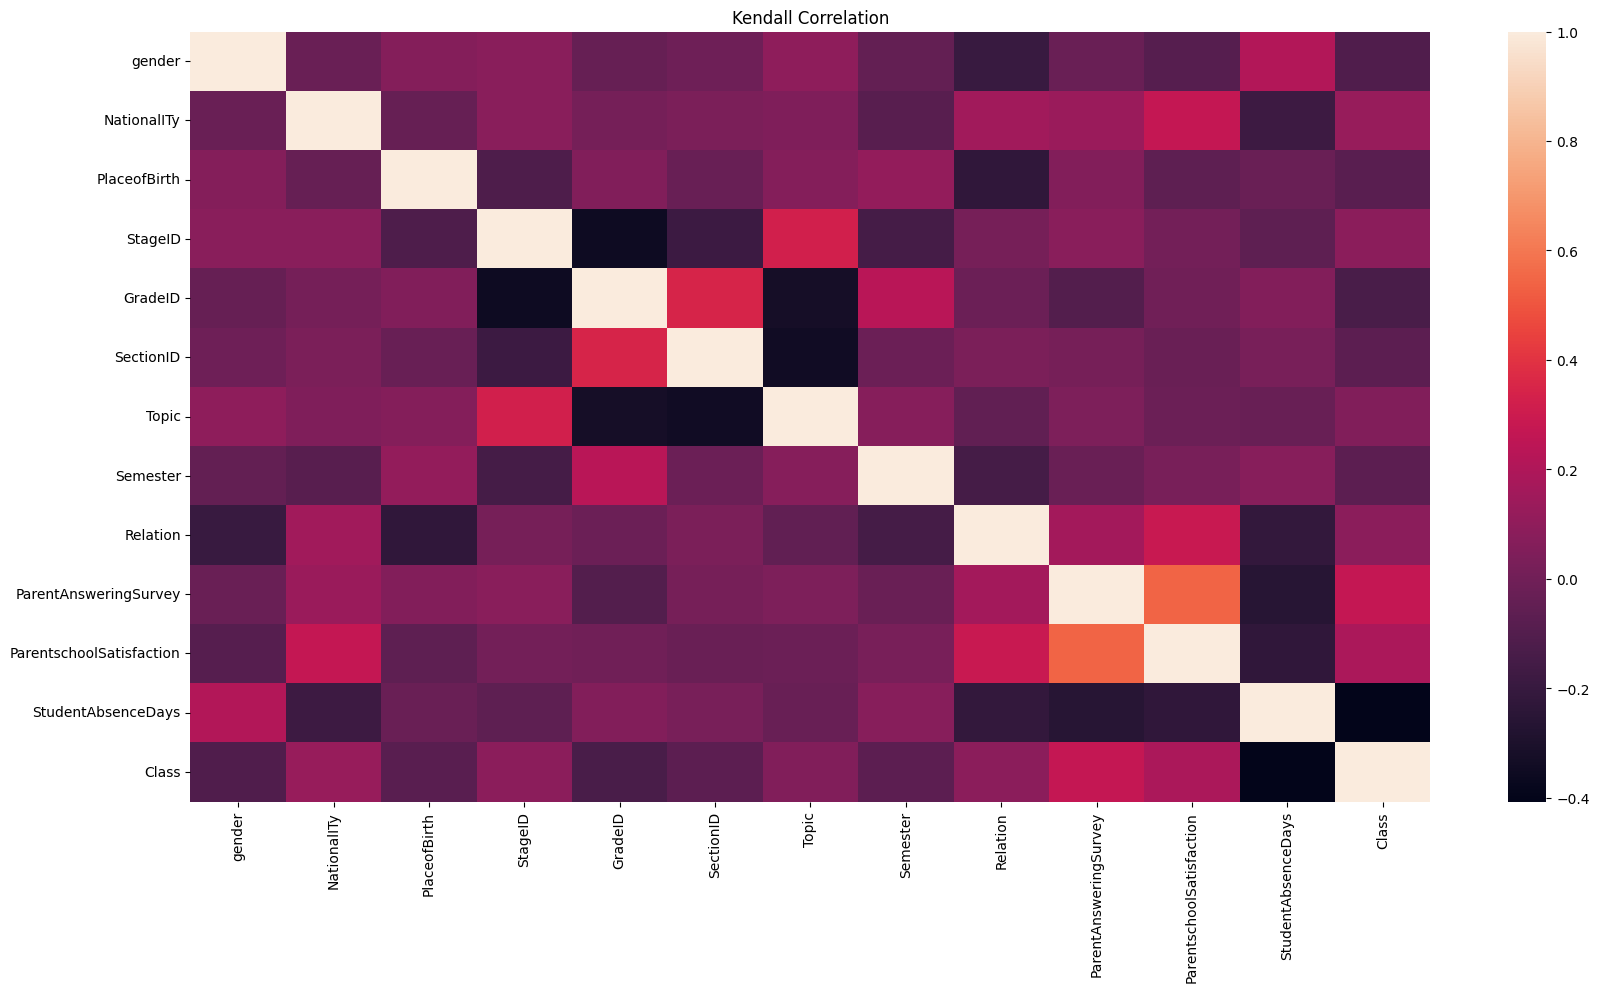

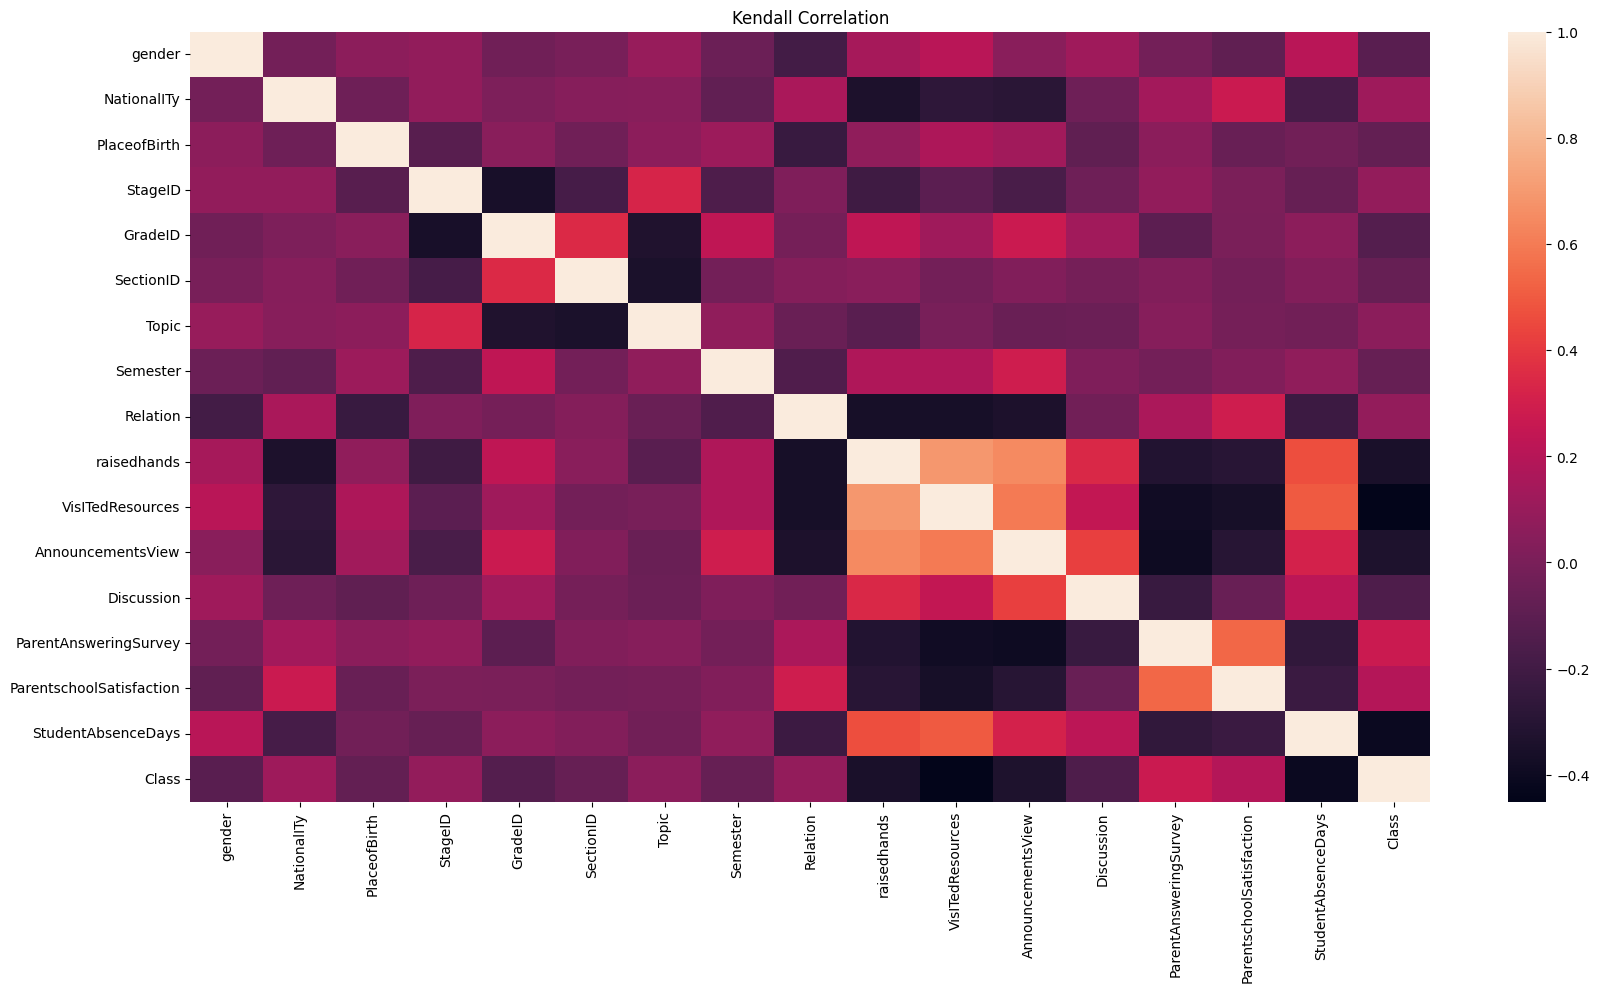

In [6]:
# plot kendall correlation
plt.figure(figsize=(20, 10))
sns.heatmap(df_categorical.corr())
plt.title('Kendall Correlation')
plt.show()

# plot kendall correlation
plt.figure(figsize=(20, 10))
sns.heatmap(df5_numeric.corr())
plt.title('Kendall Correlation')
plt.show()


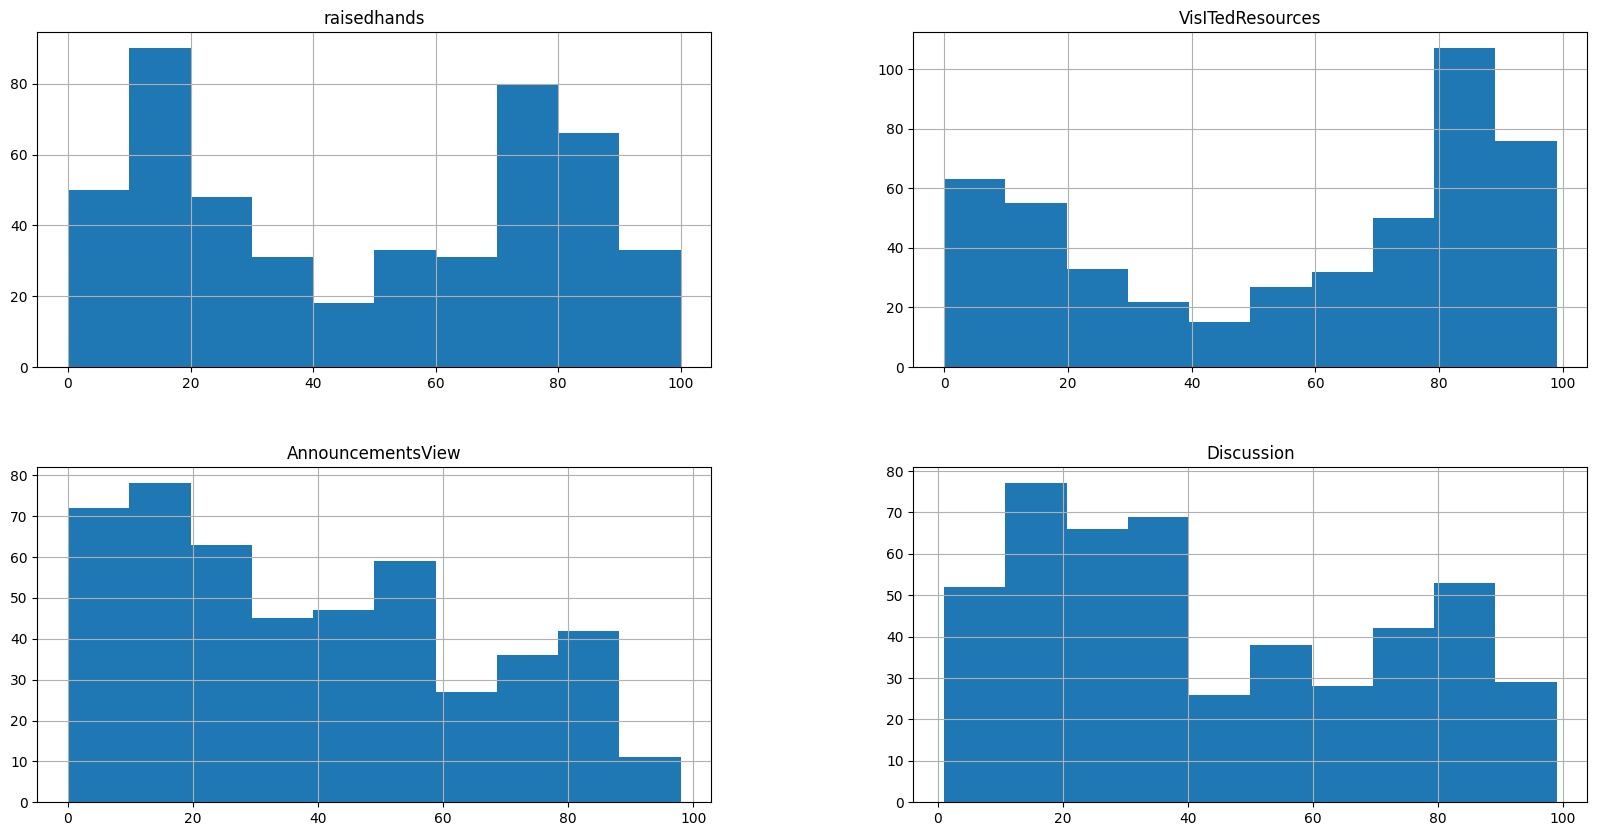

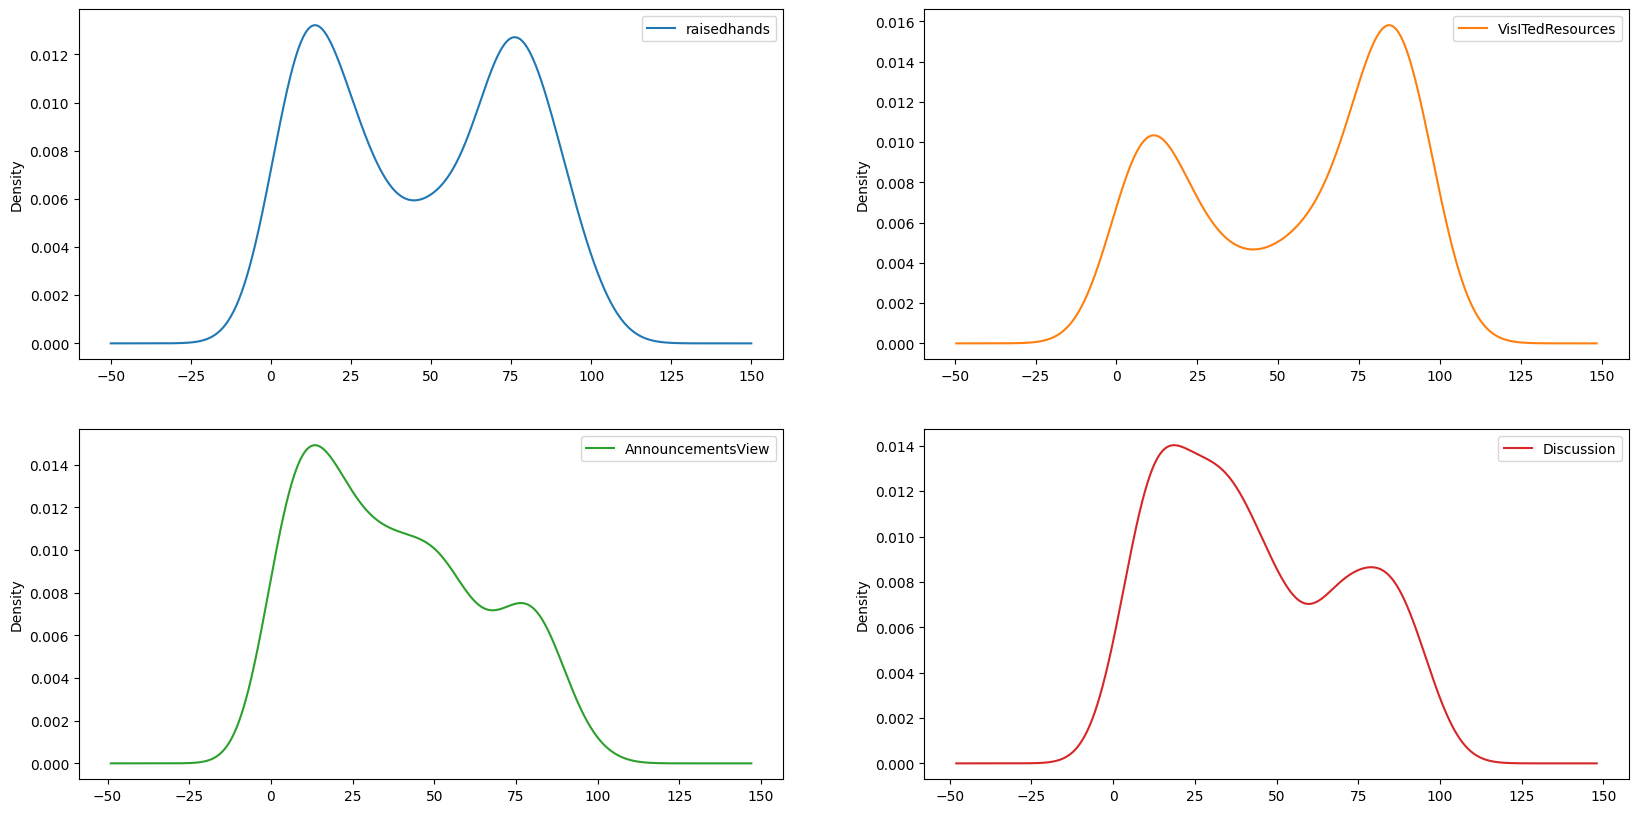

In [8]:
# plot histogram of numeric data
data_numeric.hist(figsize=(20, 10))
plt.show()

# extimate a probability density function
data_numeric.plot(kind='density', subplots=True, layout=(2,2), sharex=False, figsize=(20, 10))
plt.show()

### Observations:
- The distribution of the data is not normal, so we cannot use parametric tests.

In [12]:
## Perform Hypothesis Testing
from scipy import stats
import numpy as np

## 1. Is there a significant difference in the average grade of students who are absent and those who are present?
## H0: There is no significant difference in the average grade of students who are absent and those who are present.
## H1: There is a significant difference in the average grade of students who are absent and those who are present.

# run t-test
stats.ttest_ind(df5_numeric[df5_numeric['Class']=='L']['GradeID'], df5_numeric[df5_numeric['Class']=='M']['GradeID'])

# run ANOVA
stats.f_oneway(df5_numeric[df5_numeric['Class']=='L']['GradeID'], df5_numeric[df5_numeric['Class']=='M']['GradeID'])

/home/gaurav/miniconda3/envs/brsm/lib/python3.8/site-packages/scipy/stats/_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)